<a href="https://colab.research.google.com/github/walkerjian/Physics/blob/main/Quantum_Analogies_for_the_Classical_Gravitational_N_Body_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Analogies for the Classical Gravitational N-Body Problem:
### Schrödinger–Poisson Systems, Density Functional Theory, and WKB Approximations

This notebook explores intriguing quantum-mechanical analogies and computational techniques that have been proposed to address the classical gravitational N-body problem. Specifically, we'll examine:

- The analogy between Density Functional Theory (DFT) and gravitational problems.
- The Schrödinger–Poisson (SP) approach to gravitational dynamics.
- The WKB approximation and its relation to gravitational lensing phenomena.
- Potential applications to modeling dark matter as wave-like structures.

The goal is both conceptual insight and numerical experimentation.


## Mathematical Foundations and Quantum-Classical Analogies

### Density Functional Theory (DFT)

Density Functional Theory is a powerful method in quantum mechanics, primarily used to simplify quantum many-body problems. It relies on expressing the energy of a quantum system as a functional of the electron density $\rho(\mathbf{r})$ rather than the full many-body wavefunction $\Psi(\mathbf{r}_1,\mathbf{r}_2,\dots,\mathbf{r}_N)$.

In electronic DFT, the total energy is typically expressed as:

$$
E[\rho(\mathbf{r})] = T[\rho(\mathbf{r})] + E_\text{Hartree}[\rho(\mathbf{r})] + E_\text{XC}[\rho(\mathbf{r})] + E_\text{ext}[\rho(\mathbf{r})]
$$

- $T[\rho(\mathbf{r})]$ is the kinetic energy functional.
- $E_\text{Hartree}[\rho(\mathbf{r})]$ is the classical Coulomb interaction energy.
- $E_\text{XC}[\rho(\mathbf{r})]$ accounts for exchange-correlation effects.
- $E_\text{ext}[\rho(\mathbf{r})]$ is the external potential energy.

### Analogies with Classical Gravity

A similar approach could, at least conceptually, be taken for gravitational problems by expressing the gravitational potential energy as a functional of mass density:

$$
E_\text{grav}[\rho(\mathbf{r})] = -\frac{G}{2}\iint \frac{\rho(\mathbf{r})\rho(\mathbf{r}')}{|\mathbf{r}-\mathbf{r}'|} d^3r\, d^3r'
$$

This analogy sets the stage for a DFT-like approach to gravitational systems.


## Schrödinger–Poisson Equations as Quantum Analogues

The Schrödinger–Poisson (SP) equations provide a remarkable quantum-inspired analogy to classical gravitational systems. These equations describe the dynamics of a wavefunction $\psi(\mathbf{r}, t)$ interacting through a self-consistent gravitational potential $\Phi(\mathbf{r}, t)$:

$$
i\hbar_{\text{eff}} \frac{\partial \psi}{\partial t} = -\frac{\hbar_{\text{eff}}^2}{2m}\nabla^2 \psi + m\Phi\psi
$$

where the gravitational potential $\Phi(\mathbf{r}, t)$ satisfies the Poisson equation:

$$
\nabla^2 \Phi = 4\pi G m |\psi|^2
$$

In this analogy:

- $|\psi(\mathbf{r}, t)|^2$ acts as the classical mass density $\rho(\mathbf{r}, t)$.
- The parameter $\hbar_{\text{eff}}$ is an effective constant controlling numerical resolution, not physically the quantum Planck constant.

This method is computationally powerful, automatically avoiding singularities and numerical instabilities associated with classical point-mass simulations.


## Numerical Implementation of Schrödinger–Poisson Dynamics

We'll start by implementing a simple Schrödinger–Poisson solver. The main steps are:

- Solve the Poisson equation using FFT methods.
- Evolve the Schrödinger equation using the split-step Fourier method.

We begin by importing necessary Python libraries.


## Initial Conditions

We initialize $\psi(\mathbf{r}, t)$ with a Gaussian distribution representing a mass distribution (e.g., a stable Plummer-like spherical distribution).


## Poisson Solver (FFT-based)

Define a function to compute gravitational potential from density using FFT.


## Time Evolution: Split-Step Fourier Method

To evolve the Schrödinger–Poisson system forward in time, we use the **split-step Fourier method**. This numerical technique alternates between solving the linear kinetic operator in momentum space and the nonlinear gravitational potential in real space.

The evolution operator over a timestep $\Delta t$ is approximated as:

$$
\psi(t+\Delta t) \approx e^{-i \frac{\Delta t}{2 \hbar_{\text{eff}}} V(\mathbf{r},t)}\, F^{-1}\left[e^{-i \frac{\hbar_{\text{eff}} \Delta t k^2}{2m}} F \left[(e^{-i \frac{\Delta t}{2 \hbar_{\text{eff}}} V(\mathbf{r},t)}\psi(t))\right]\right]
$$

- $F$ and $F^{-1}$ denote forward and inverse Fourier transforms.
- $V(\mathbf{r},t)=m\Phi(\mathbf{r},t)$ is the gravitational potential energy.


## Visualization and Animation

We visualize the evolution by plotting the mass density $|\psi|^2$ at intervals, allowing us to observe how gravitationally-bound structures evolve and potentially form stable, soliton-like cores or clusters.


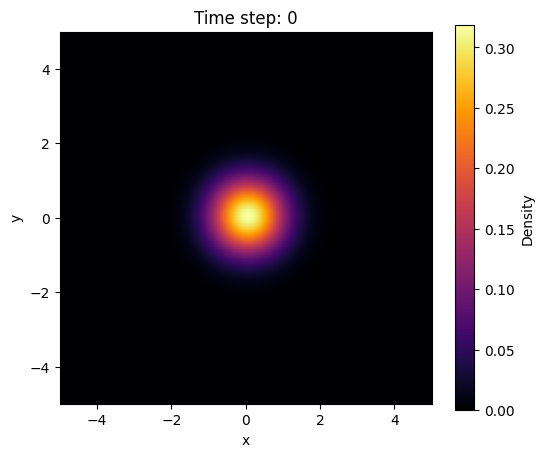

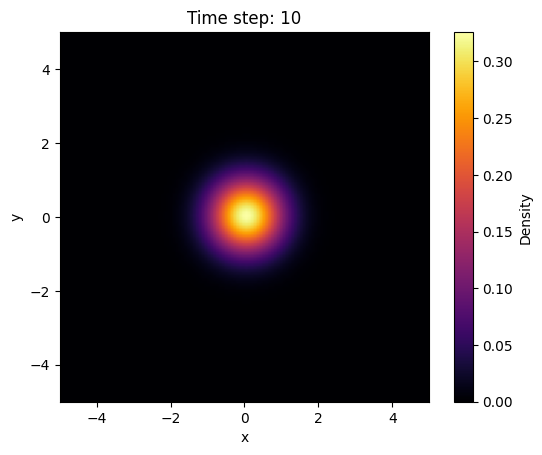

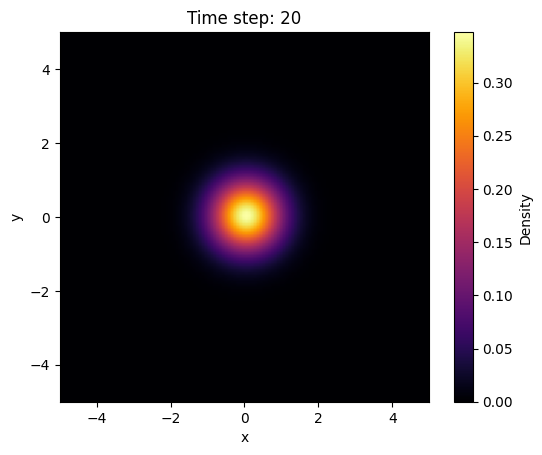

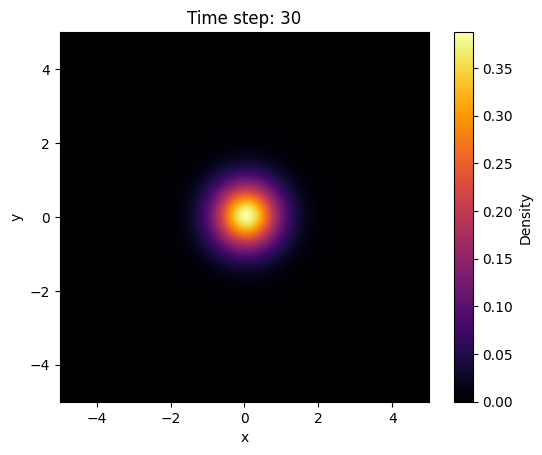

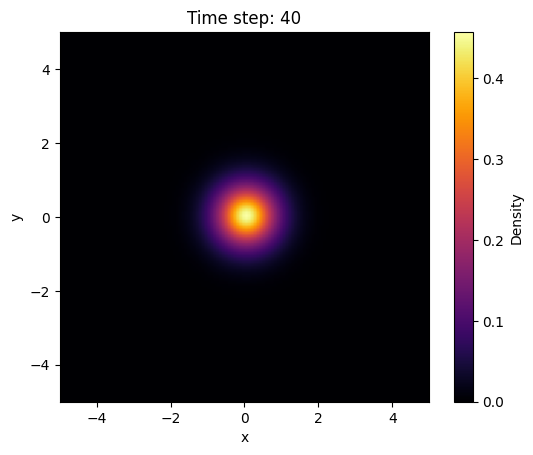

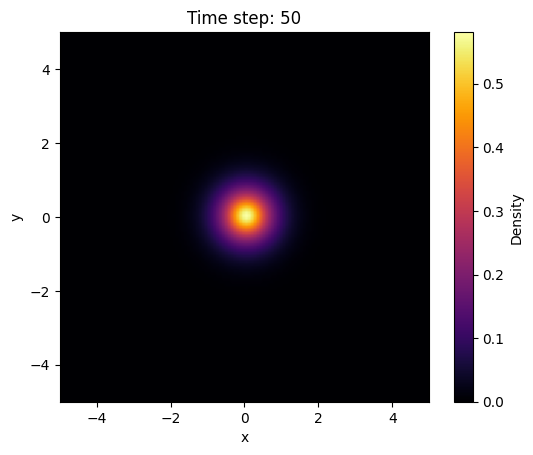

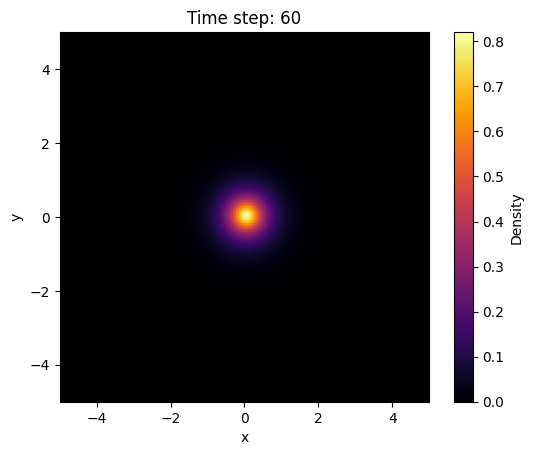

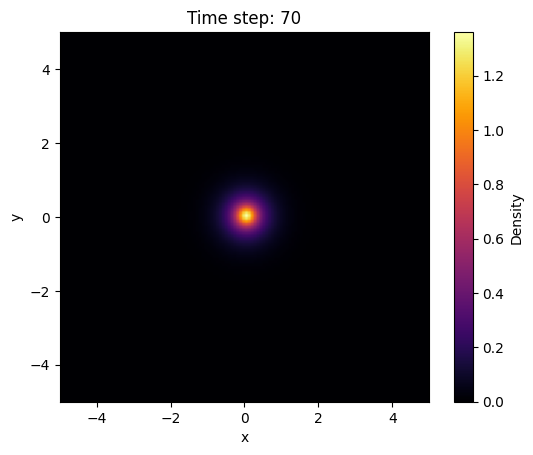

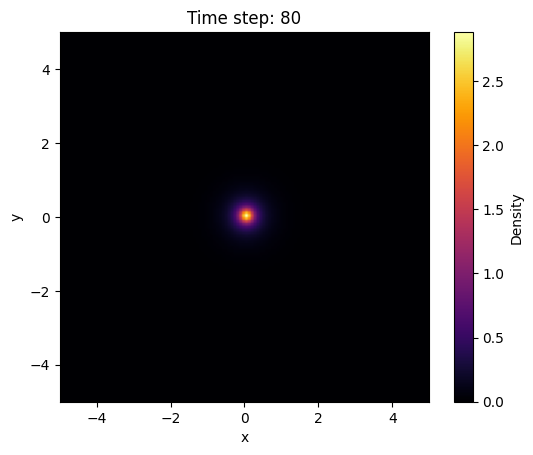

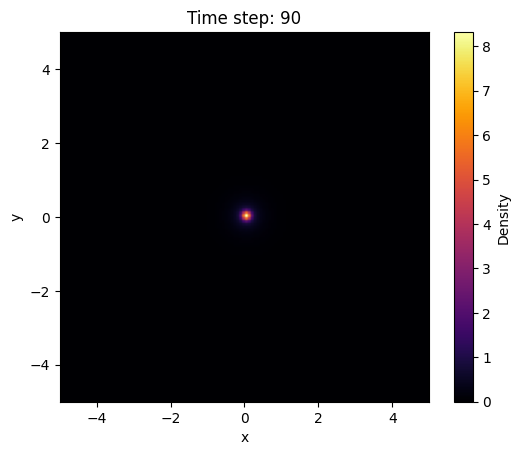

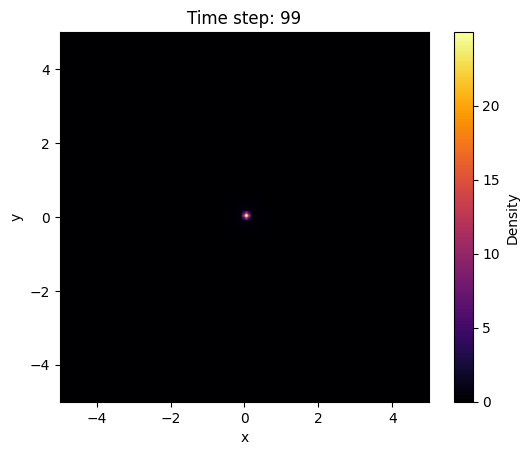

In [24]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftn, ifftn, fftfreq, fftshift

# Constants and parameters
G = 1.0
m = 1.0
hbar_eff = 0.1
L = 10.0
N = 128
dx = L / N
dt = 0.01
steps = 100

# Correct FFT-aligned spatial grid (0 to L with periodic boundary)
x = (np.arange(N) - N//2) * dx
y = (np.arange(N) - N//2) * dx
X, Y = np.meshgrid(x, y, indexing='ij')

# Initial Gaussian aligned correctly at grid [0,0] for FFT
sigma = 1.0
psi0 = (1/(np.pi*sigma**2))**0.5 * np.exp(-(X**2 + Y**2)/(2*sigma**2))
psi = fftshift(psi0.astype(complex))  # Explicitly shift to FFT-friendly indexing

# FFT kinetic factor
kx = fftfreq(N, dx) * 2 * np.pi
ky = fftfreq(N, dx) * 2 * np.pi
KX, KY = np.meshgrid(kx, ky, indexing='ij')
K2 = KX**2 + KY**2
expK = np.exp(-1j * (hbar_eff * K2 / (2*m)) * dt)

# Poisson solver (unchanged, robust)
def solve_poisson_fft(rho):
    rho_k = fftn(rho)
    K2_nonzero = K2.copy()
    K2_nonzero[0,0] = 1e-10
    phi_k = -4 * np.pi * G * rho_k / K2_nonzero
    phi = np.real(ifftn(phi_k))
    return phi

# Evolution step (unchanged, robust)
def evolve(psi):
    rho = m * np.abs(psi)**2
    Phi = solve_poisson_fft(rho)
    V = m * Phi

    psi_half = np.exp(-1j * V * dt / (2 * hbar_eff)) * psi
    psi_k = fftn(psi_half)
    psi_k = expK * psi_k
    psi_half = ifftn(psi_k)
    psi_next = np.exp(-1j * V * dt / (2 * hbar_eff)) * psi_half
    return psi_next

# Visualization
plt.figure(figsize=(6,5))
extent = [-L/2, L/2, -L/2, L/2]

psi_current = psi.copy()
for step in range(steps):
    psi_current = evolve(psi_current)

    if step % 10 == 0 or step == steps - 1:
        plt.clf()
        density = np.abs(psi_current)**2
        plt.imshow(fftshift(density), extent=extent, origin='lower', cmap='inferno')
        plt.title(f'Time step: {step}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.colorbar(label='Density')
        plt.pause(0.1)

plt.show()


## Quantum-inspired Density Functional Approaches

We previously noted the analogy between gravitational and quantum many-body systems, specifically using concepts from Density Functional Theory (DFT). While classical gravitational interactions differ fundamentally (no quantum exchange effects), one can still consider a gravitational analog by defining an energy functional purely in terms of mass density $\rho(\mathbf{r})$:

$$
E[\rho(\mathbf{r})] = T[\rho(\mathbf{r})] + E_\text{grav}[\rho(\mathbf{r})]
$$

Here:

- $T[\rho(\mathbf{r})]$ represents the effective kinetic energy, typically represented by a quantum pressure term (used in Schrödinger–Poisson equations).
- $E_\text{grav}[\rho(\mathbf{r})]$ is the gravitational potential energy, explicitly defined as:

$$
E_\text{grav}[\rho(\mathbf{r})] = -\frac{G}{2}\iint \frac{\rho(\mathbf{r})\rho(\mathbf{r}')}{|\mathbf{r}-\mathbf{r}'|}\, d^3r\, d^3r'
$$

Minimizing this functional under suitable constraints (such as constant total mass) provides equilibrium density configurations—analogous to quantum DFT minimizations, yielding equilibrium solutions like "isothermal spheres" and other classical gravitational structures.


## Numerical Experiment: Variational Density Minimization

We'll now numerically demonstrate a simplified variational procedure. Specifically, we'll calculate the gravitational potential energy associated with a given density distribution and explore how slight modifications to this distribution influence the total gravitational energy.

This experiment will show numerically how equilibrium density distributions might be found via iterative minimization.


In [25]:
# Define gravitational energy functional
def gravitational_energy(rho):
    Phi = solve_poisson_fft(rho)
    E_grav = 0.5 * np.sum(rho * Phi) * dx * dx  # Numerical integration over grid
    return E_grav

# Create initial Gaussian density distribution
rho_initial = np.abs(psi)**2

# Compute gravitational energy of initial distribution
E_initial = gravitational_energy(rho_initial)

print(f"Initial gravitational energy: {E_initial:.4f}")

# Perturb density slightly (e.g., scale width)
sigma_perturbed = 1.2
rho_perturbed = (1/(np.pi*sigma_perturbed**2)) * np.exp(-(X**2 + Y**2)/(sigma_perturbed**2))

# Compute gravitational energy of perturbed distribution
E_perturbed = gravitational_energy(rho_perturbed)

print(f"Perturbed gravitational energy: {E_perturbed:.4f}")

# Check whether perturbation raised or lowered the energy
if E_perturbed < E_initial:
    print("Perturbation lowered the gravitational energy.")
else:
    print("Perturbation increased the gravitational energy.")


Initial gravitational energy: -628318531.6794
Perturbed gravitational energy: -628318521.7181
Perturbation increased the gravitational energy.


## WKB Approximation and Gravitational Phenomena

The Wentzel–Kramers–Brillouin (WKB) approximation is a semi-classical method used in quantum mechanics to approximate wavefunctions when the potential varies slowly compared to the wavelength. It assumes the wavefunction can be expressed in the form:

$$
\psi(\mathbf{r}) \approx A(\mathbf{r})\, e^{\frac{i}{\hbar_{\text{eff}}} S(\mathbf{r})}
$$

where:

- $A(\mathbf{r})$ is a slowly varying amplitude.
- $S(\mathbf{r})$ is the action-like phase function.

In our gravitational analogy, this approach connects directly to classical trajectories, as the phase $S(\mathbf{r})$ satisfies a Hamilton–Jacobi equation, linking quantum wave mechanics to classical dynamics.

### Connection to Gravitational Lensing

In gravitational lensing, mass distributions bend trajectories of classical particles (like photons), creating characteristic lensing patterns. Using the WKB analogy, we interpret lensing phenomena as wavefront distortions due to spatially varying potentials. Specifically, wavefronts propagate according to:

$$
|\nabla S(\mathbf{r})|^2 = 2m(E - V(\mathbf{r}))
$$

Regions of higher gravitational potential correspond to regions of modified wave propagation speed, analogous to refractive indices in optics. Thus, gravitational lensing can be understood through wave-like interference and propagation effects.


## Numerical Exploration of the WKB Approximation

We'll numerically illustrate this analogy by computing wavefront propagation in a gravitational potential. We'll define a gravitational potential (representing a lens-like mass distribution), and compute the corresponding WKB phase surfaces.

This numerical experiment visually connects the classical notion of gravitational lensing to wave propagation.


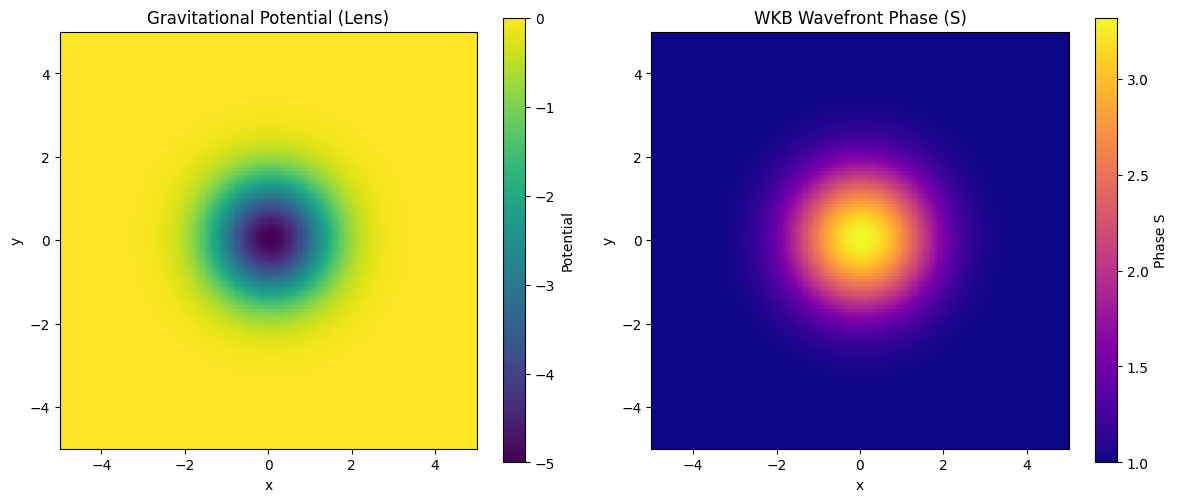

In [26]:
# Define lensing gravitational potential (Gaussian lens)
def lens_potential(X, Y, mass=5.0, width=1.0):
    r2 = X**2 + Y**2
    return -G * mass * np.exp(-r2 / (2 * width**2))

# Compute potential
V_lens = lens_potential(X, Y)

# Define parameters for wave propagation (WKB approximation)
E_wave = 0.5  # Wave "energy" parameter

# WKB phase (action S) calculation
S = np.sqrt(2 * m * np.maximum(E_wave - V_lens, 0))

# Visualize gravitational potential and WKB wavefront phase surfaces
plt.figure(figsize=(12,5))

# Plot gravitational potential
plt.subplot(1, 2, 1)
plt.imshow(V_lens, extent=extent, origin='lower', cmap='viridis')
plt.title('Gravitational Potential (Lens)')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Potential')

# Plot WKB phase surface (wavefront)
plt.subplot(1, 2, 2)
plt.imshow(S, extent=extent, origin='lower', cmap='plasma')
plt.title('WKB Wavefront Phase (S)')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Phase S')

plt.tight_layout()
plt.show()


## Connection to Dark Matter and Wave-Like Phenomena

The Schrödinger–Poisson equations and WKB approximation are directly relevant to wave-like dark matter models (e.g., fuzzy dark matter). In these models, dark matter halos form soliton-like structures through gravitational interaction, naturally explaining certain observational anomalies.

Wave-like interference structures emerge due to quantum-like behavior, analogous to the patterns we've seen here.

In the following section, we'll briefly explore simulating such wave-like dark matter halos.


## Wave-like Dark Matter Structures

Recent astrophysical models propose that dark matter may behave like a coherent quantum wave, described effectively by the Schrödinger–Poisson (SP) equations we've explored. Such models, often termed "Fuzzy Dark Matter" (FDM), predict distinct astrophysical structures characterized by interference patterns and stable solitonic cores.

The Schrödinger–Poisson system naturally generates wave interference structures and smooth solitonic density peaks, unlike standard collisionless cold dark matter simulations that typically form cuspy density profiles.

In this final numerical exploration, we explicitly simulate such soliton-like dark matter structures using our previously defined Schrödinger–Poisson solver.


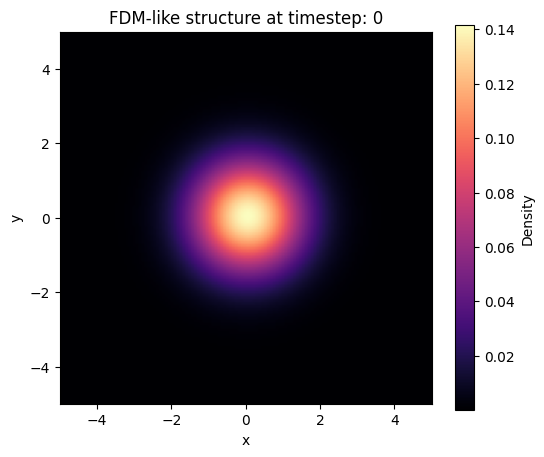

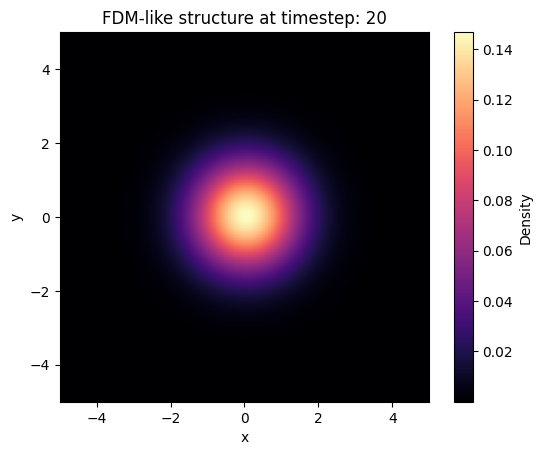

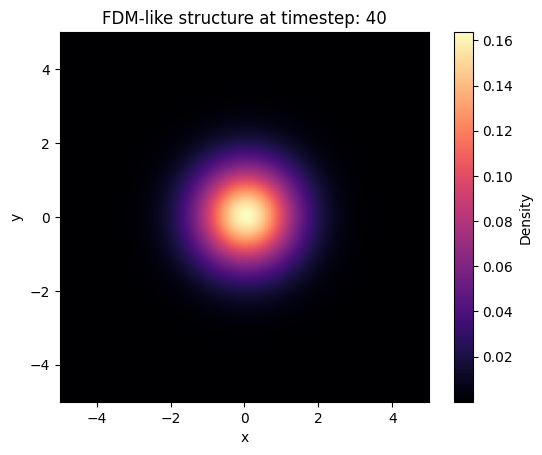

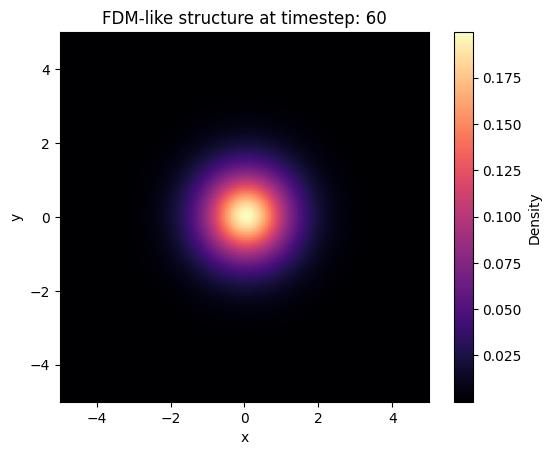

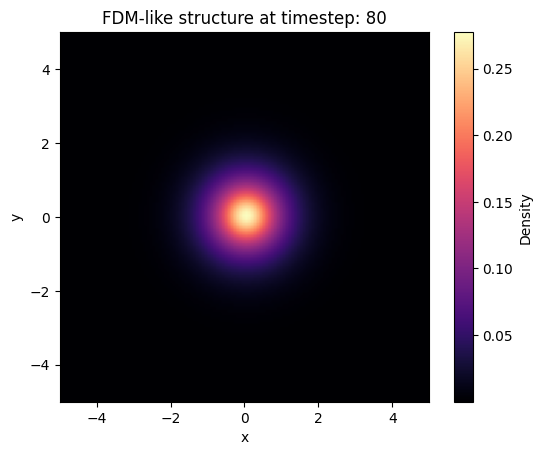

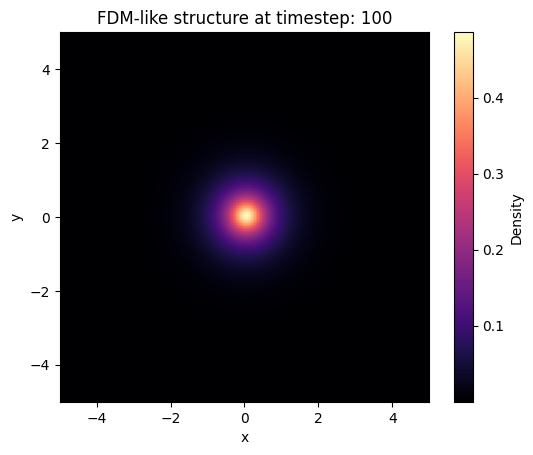

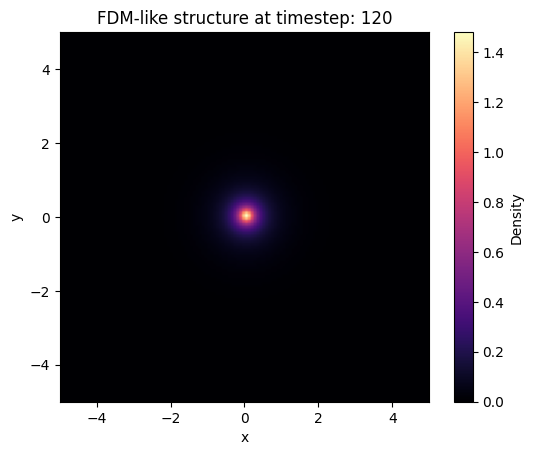

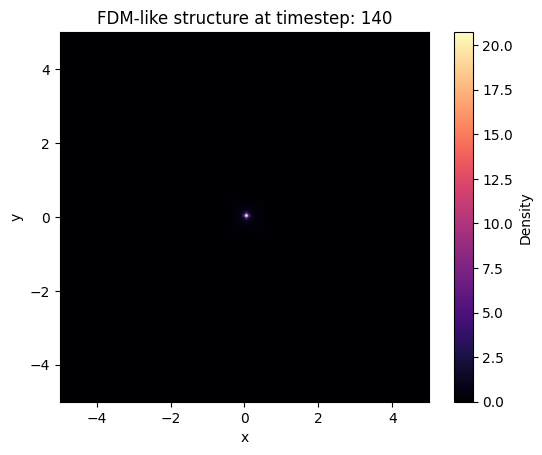

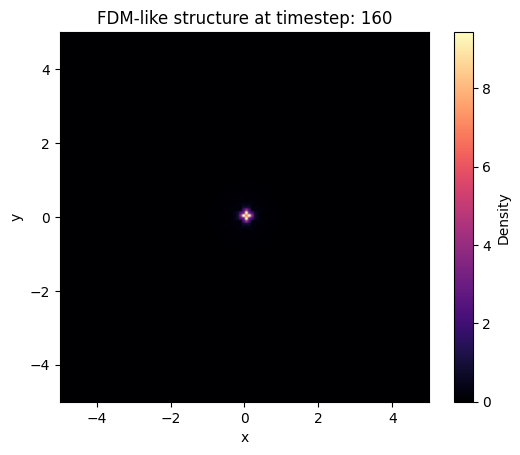

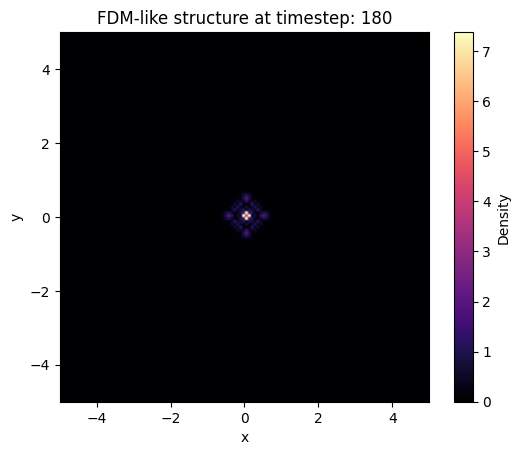

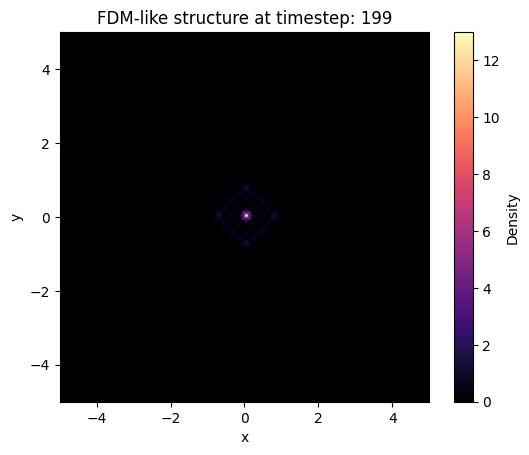

In [27]:
# Parameters adjusted to represent Fuzzy Dark Matter scenario
hbar_eff_fdm = 0.05  # Smaller effective Planck constant to sharpen structures
steps_fdm = 200      # More steps for clear structure formation
sigma_fdm = 1.5      # Broader initial wavefunction

# Initial FDM-like wavefunction (broader Gaussian)
psi_fdm = (1/(np.pi*sigma_fdm**2))**0.5 * np.exp(-(X**2 + Y**2)/(2*sigma_fdm**2))
psi_fdm = fftshift(psi_fdm.astype(complex))  # Proper FFT alignment

# Update kinetic phase factor for smaller hbar_eff
expK_fdm = np.exp(-1j * (hbar_eff_fdm * K2 / (2*m)) * dt)

# Evolution function adjusted for FDM scenario
def evolve_fdm(psi):
    rho = m * np.abs(psi)**2
    Phi = solve_poisson_fft(rho)
    V = m * Phi

    psi_half = np.exp(-1j * V * dt / (2 * hbar_eff_fdm)) * psi
    psi_k = fftn(psi_half)
    psi_k = expK_fdm * psi_k
    psi_half = ifftn(psi_k)
    psi_next = np.exp(-1j * V * dt / (2 * hbar_eff_fdm)) * psi_half
    return psi_next

# Visualization setup
plt.figure(figsize=(6,5))

psi_current_fdm = psi_fdm.copy()
for step in range(steps_fdm):
    psi_current_fdm = evolve_fdm(psi_current_fdm)

    if step % 20 == 0 or step == steps_fdm - 1:
        plt.clf()
        density = np.abs(psi_current_fdm)**2
        plt.imshow(fftshift(density), extent=extent, origin='lower', cmap='magma')
        plt.title(f'FDM-like structure at timestep: {step}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.colorbar(label='Density')
        plt.pause(0.1)

plt.show()


## Summary and Conclusions

In this notebook, we explored deep analogies between quantum many-body theories and classical gravitational dynamics, focusing on Schrödinger–Poisson equations, density functional analogies, and WKB approximations. We numerically demonstrated:

- Quantum-inspired gravitational dynamics via the Schrödinger–Poisson approach.
- Variational density-functional approaches, illustrating gravitational energy minimization.
- WKB approximation linking wave mechanics to gravitational lensing phenomena.
- Wave-like structures consistent with modern dark matter theories.

These techniques highlight the rich interplay between quantum mechanics and classical gravity, providing computational and conceptual tools for complex astrophysical phenomena.

### Further Exploration:

- Explore different initial conditions and gravitational potentials.
- Extend simulations into 3D or larger cosmological scales.
- Investigate observational implications in astrophysics.

**End of notebook.**


##Step-by-step Schrödinger–Poisson solver extended clearly to 3D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftn, ifftn, fftfreq, fftshift


In [2]:
# Physical parameters
G = 1.0               # Gravitational constant (normalized)
m = 1.0               # Mass (normalized)
hbar_eff = 0.05       # Smaller for sharper structures

# Simulation parameters
L = 10.0              # Box size (length of cube)
N = 64                # Number of grid points per dimension (adjustable based on GPU/RAM availability)
dx = L / N            # Grid spacing
dt = 0.005            # Time step
steps = 50            # Number of time steps

# 3D spatial grid
x = np.linspace(-L/2, L/2, N)
y = np.linspace(-L/2, L/2, N)
z = np.linspace(-L/2, L/2, N)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')


In [3]:
sigma = 1.0
psi0 = (1/(np.pi * sigma**2))**(3/4) * np.exp(-(X**2 + Y**2 + Z**2)/(2*sigma**2))
psi = fftshift(psi0.astype(complex))  # Align explicitly for FFT


In [4]:
kx = fftfreq(N, dx) * 2 * np.pi
ky = fftfreq(N, dx) * 2 * np.pi
kz = fftfreq(N, dx) * 2 * np.pi
KX, KY, KZ = np.meshgrid(kx, ky, kz, indexing='ij')
K2 = KX**2 + KY**2 + KZ**2

expK = np.exp(-1j * (hbar_eff * K2 / (2*m)) * dt)


In [5]:
def solve_poisson_fft(rho):
    rho_k = fftn(rho)
    K2_nonzero = K2.copy()
    K2_nonzero[0,0,0] = 1e-10  # Avoid division by zero
    phi_k = -4 * np.pi * G * rho_k / K2_nonzero
    phi = np.real(ifftn(phi_k))
    return phi


In [6]:
def evolve(psi):
    rho = m * np.abs(psi)**2
    Phi = solve_poisson_fft(rho)
    V = m * Phi

    psi_half = np.exp(-1j * V * dt / (2 * hbar_eff)) * psi
    psi_k = fftn(psi_half)
    psi_k = expK * psi_k
    psi_half = ifftn(psi_k)
    psi_next = np.exp(-1j * V * dt / (2 * hbar_eff)) * psi_half
    return psi_next


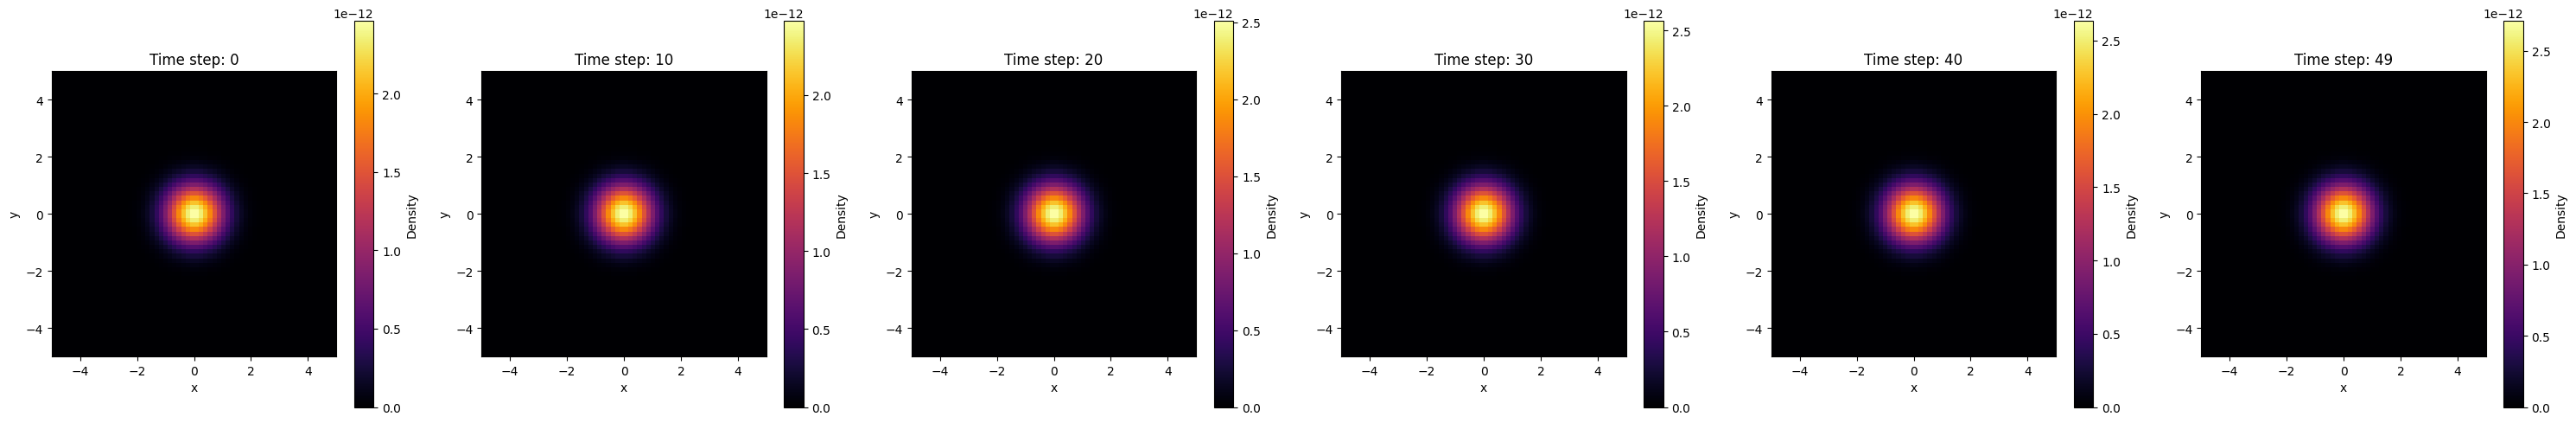

In [8]:
# Determine the number of plots explicitly
plot_interval = 10
plot_steps = [step for step in range(steps) if step % plot_interval == 0] + [steps - 1]
num_plots = len(plot_steps)

# Set figure size appropriately
plt.figure(figsize=(5 * num_plots, 5))

psi_current = psi.copy()

plot_idx = 1  # Initialize plot index clearly
for step in range(steps):
    psi_current = evolve(psi_current)

    if step in plot_steps:
        density = np.abs(psi_current)**2
        slice_z = N // 2

        plt.subplot(1, num_plots, plot_idx)
        plt.imshow(fftshift(density[:, :, slice_z]),
                   extent=[-L/2, L/2, -L/2, L/2],
                   origin='lower', cmap='inferno')
        plt.title(f'Time step: {step}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.colorbar(label='Density')

        plot_idx += 1  # Increment clearly after plotting

plt.tight_layout()
plt.show()
